<a href="https://colab.research.google.com/github/Smpests/KeepLearning/blob/master/jupyter-notebook/ml/%E6%9C%BA%E5%99%A8%E5%AD%A6%E4%B9%A0Day1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""
数据类型：
1.数值Numerical。数字，也分为离散（如经过某个路口的人的数量）和连续（如水的深度、树的高度）两类。
2.分类Categorical。无法比较的值，数据相互独立的概念，如不同颜色、不同文体类型等。
3.有序类型Ordinal。可比较的分类数据，如学生A的成绩优于B的。
统计学比较关注的三个值：
1.均值Mean。
2.中值Median。
3.众数Mode，最常出现的值。
"""

In [3]:
import numpy as np
import pandas as pd
from scipy import stats

# 汽车速度数据
speed = [99,86,87,88,111,86,103,87,94,78,77,85,86]
print("均值：", np.mean(speed))
print("中值：", np.median(speed))
print("众数：", stats.mode(speed, keepdims=True))
print("众数：", pd.Series(speed).mode())

均值： 89.76923076923077
中值： 87.0
众数： ModeResult(mode=array([86]), count=array([3]))
众数： 0    86
dtype: int64


In [13]:
# 标准差：描述了值的分布情况。标准差小意味着每个值都比较接近平均值，标准差大则说明值之间差距较大、分布更宽。
# 计算标准差，标准差=sqrt(((x1-x)²+(x2-x)²+...+(xn-x)²)/n)，其中x是平均值，n是元素总数,sqrt()函数是求平方根/开方。
from math import sqrt
import numpy as np

speed = [86,87,88,86,87,85,86]
mean = np.mean(speed)
print(mean)
print("标准差：", sqrt(sum((x - mean) * (x - mean) for x in speed) / len(speed)))

# 使用numpy求标准差
print(np.std(speed))
print("标准差：", np.std([32,111,138,28,59,77,97]))

# 方差，即标准差的平方
print("方差：", np.var([32,111,138,28,59,77,97]))

86.42857142857143
标准差： 0.9035079029052513
0.9035079029052513
标准差： 37.84501153334721
方差： 1432.2448979591834


In [2]:
import numpy as np

# 一组年龄
ages = [5,31,43,48,50,41,7,11,15,39,80,82,32,2,8,6,25,36,27,61,31]
# 表示查询75%的人年龄在什么多少岁之下
print(np.percentile(ages, 75))
# 90%的人都比多少岁年轻
print(np.percentile(ages, 90))

43.0
61.0


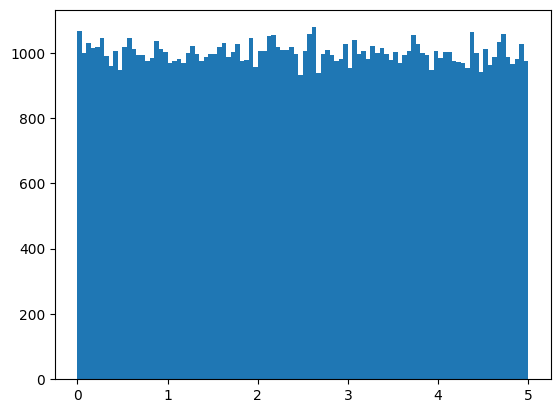

In [3]:
import numpy
import matplotlib.pyplot as plt

x = numpy.random.uniform(0.0, 5.0, 100000)

plt.hist(x, 100)
plt.show()

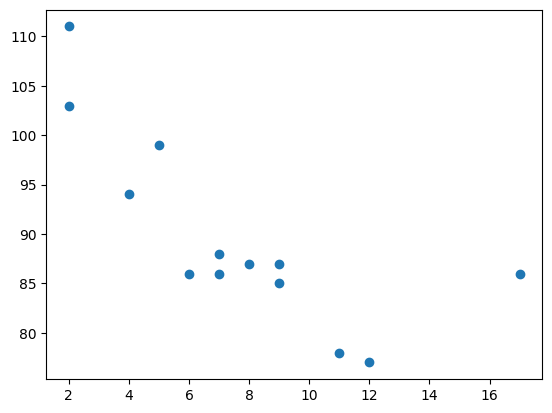

r值： -0.758591524376155
10年车龄的预测车速： 85.59308314937454


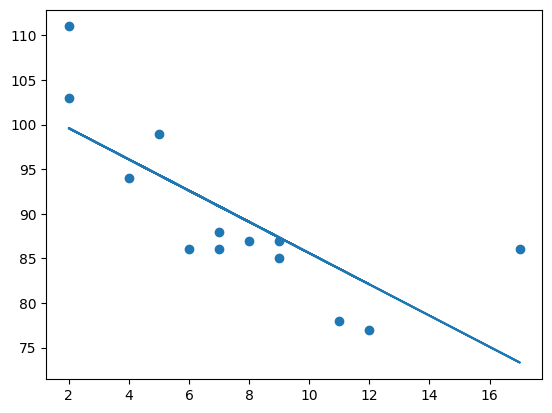

r值： 0.01331814154297491


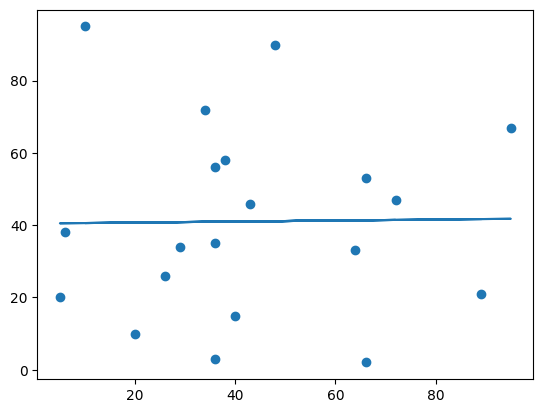

In [8]:
# 回归：在机器学习和统计建模中，该关系用于预测未来事件的结果。
# 线性回归：使用数据点之间的关系来绘制一条穿过所有数据点的直线，这条线可以用来预测未来的值。

import matplotlib.pyplot as plt
from scipy import stats

# 一组车龄数据
x = [5,7,8,7,2,17,2,9,4,11,12,9,6]
# 一组车速数据
y = [99,86,87,88,111,86,103,87,94,78,77,85,86]

plt.scatter(x, y)
plt.show()

# 返回的是线性回归相关的重要值
# 其中r代表关系，范围[-1, 1]，负值负相关，正直正相关，越接近1越相关
slope, intercept, r, p, std_err = stats.linregress(x, y)

print("r值：", r)

# 此方法用于计算y的新值
def myfunc(x):
  return slope * x + intercept

# 预测10年车龄的车速
print("10年车龄的预测车速：", myfunc(10))

mymodel = list(map(myfunc, x))

# 散点图
plt.scatter(x, y)
# 线性回归线
plt.plot(x, mymodel)
# 合并显示
plt.show()

# 相关性很低的数据，不能得到好的预测结果
# 以下数据导致线性回归拟合很差，r值0.013表示这个数据集不合适做线性回归
x = [89,43,36,36,95,10,66,34,38,20,26,29,48,64,6,5,36,66,72,40]
y = [21,46,3,35,67,95,53,72,58,10,26,34,90,33,38,20,56,2,47,15]

slope, intercept, r, p, std_err = stats.linregress(x, y)

print("r值：", r)
mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()

r²： 0.9432150416451026


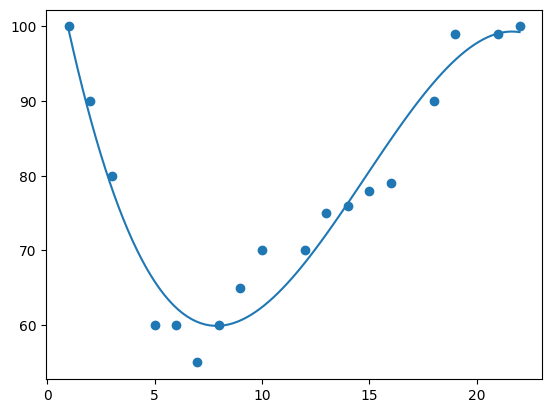

17:00时的通过速度： 88.87331269698001
20:00时的通过速度： 97.76768832747528
r²： 0.009952707566680652


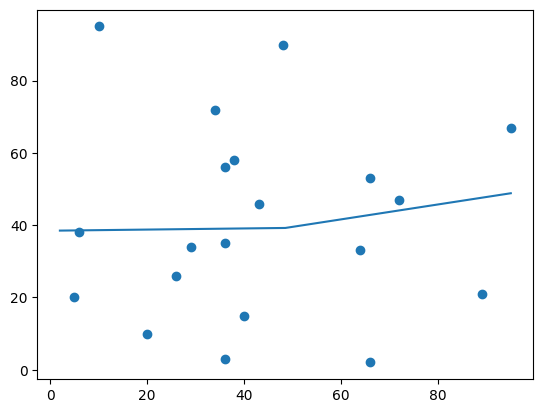

In [22]:
# 多项式回归：和线性回归一样使用x和y之间的关系来画线
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# 一组收费站超车发生时间的数据
x = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
# 一组通过收费站的车速数据
y = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]

# 创建一个多项式模型，其中polyfit的第三个参数是拟合次数
# 拟合次数太少会导致不完全拟合，拟合次数过多会导致过拟合
mymodel = np.poly1d(numpy.polyfit(x, y, 3))

# r²该值是表示x和y之间的关系，取值范围[0,1]，0表示没有关系，1表示100%相关。
# 下面的函数将计算上述数据的r²，根据该值就可以判断我们的数据在多项式回归中的拟合程度如何。
print("r²：", r2_score(y, mymodel(x)))

# 三个参数（X轴起始值x1，终止值x2，元素个数n：默认100个）
# 用于生成[x1, x2]之间的n个线性矢量
myline = np.linspace(1, 22, 100)
plt.scatter(x, y)
# 绘制多项式回归线
plt.plot(myline, mymodel(myline))
plt.show()

# 下面将预测数据集中没有的17:00和20:00时，通过收费站的汽车的速度
# 也可以直接从回归线上观察
print("17:00时的通过速度：", mymodel(17))
print("20:00时的通过速度：", mymodel(20))

# 不合适的数据也将导致多项式回归的拟合非常差
x = [89,43,36,36,95,10,66,34,38,20,26,29,48,64,6,5,36,66,72,40]
y = [21,46,3,35,67,95,53,72,58,10,26,34,90,33,38,20,56,2,47,15]

mymodel = numpy.poly1d(numpy.polyfit(x, y, 3))
# r²仅为0.0099，此时不在适合使用多项式回归来预测
print("r²：", r2_score(y, mymodel(x)))
myline = numpy.linspace(2, 95, 3)

plt.scatter(x, y)
plt.plot(myline, mymodel(myline))
plt.show()

In [28]:
# 多元回归：类似线性回归，但具有多个独立值，可以根据两个及以上的变量来预测一个值

# 下面通过发动机的大小来预测汽车的二氧化碳排放量，辅助数据有汽车的重量、体积等
# 数据集下载https://www.w3schools.com/python/data.csv

import pandas as pd
from sklearn import linear_model

df = pd.read_csv("car.csv")
# 取以下两列作为x轴的数据，自变量
X = df[["Weight", "Volume"]]
# y值则是我们要预测的数据，因变量
y = df["CO2"]

# 创建回归对象
regr = linear_model.LinearRegression()
# 回归对象填充数据,加.values避免警告，因为X是DataFrame有表头，这一行被带入，而输入是只需要数值
regr.fit(X.values, y)
# Coefficient（系数）描述未知变量之间的关系因子，
# 比如，在本例中，关系因子表示体重每增加1kg、体积增大1cm3，则CO2的排放量会增加多少
# 可通过控制变量法验证
print("Coefficient（系数）：", regr.coef_)

# 预测重量为2300、体积为1300的车的排放量
predictedCO2 = regr.predict([[2300, 1300]])
print(predictedCO2)

Coefficient（系数）： [0.00755095 0.00780526]
[107.2087328]


In [37]:
# Scale：当你的数据具有不同的值或者单位，就很难比较它们。比如10米换成公斤是多少？
# 下面要说的就是如何将它们缩放(scaling)为可比较的值
import pandas as pd

df = pd.read_csv("car.csv")

# 公式: z = (x - u) / s，z是新值、x是原始值、u是平均值，s是标准差
# sklearn模块中的StandardScaler()函数实现了该方法
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
# 用于数据转换对象
scale = StandardScaler()
X = df[['Weight', 'Volume']]
print(X.values)
# 对象的转换方法
scaledX = scale.fit_transform(X.values)
print(scaledX)

# 转换之后依旧使用多元回归模型来预测CO2
y = df['CO2']
regr = linear_model.LinearRegression()
regr.fit(scaledX, y)

# 输入也要先经过转换
scaledInput = scale.transform([[2300, 1300]])
print("scaledInput: ", scaledInput)
predictedCO2 = regr.predict(scaledInput)
print(predictedCO2)

[[ 790 1000]
 [1160 1200]
 [ 929 1000]
 [ 865  900]
 [1140 1500]
 [ 929 1000]
 [1109 1400]
 [1365 1500]
 [1112 1500]
 [1150 1600]
 [ 980 1100]
 [ 990 1300]
 [1112 1000]
 [1252 1600]
 [1326 1600]
 [1330 1600]
 [1365 1600]
 [1280 2200]
 [1119 1600]
 [1328 2000]
 [1584 1600]
 [1428 2000]
 [1365 2100]
 [1415 1600]
 [1415 2000]
 [1465 1500]
 [1490 2000]
 [1725 2000]
 [1523 1600]
 [1705 2000]
 [1605 2100]
 [1746 2000]
 [1235 1600]
 [1390 1600]
 [1405 1600]
 [1395 2500]]
[[-2.10389253 -1.59336644]
 [-0.55407235 -1.07190106]
 [-1.52166278 -1.59336644]
 [-1.78973979 -1.85409913]
 [-0.63784641 -0.28970299]
 [-1.52166278 -1.59336644]
 [-0.76769621 -0.55043568]
 [ 0.3046118  -0.28970299]
 [-0.7551301  -0.28970299]
 [-0.59595938 -0.0289703 ]
 [-1.30803892 -1.33263375]
 [-1.26615189 -0.81116837]
 [-0.7551301  -1.59336644]
 [-0.16871166 -0.0289703 ]
 [ 0.14125238 -0.0289703 ]
 [ 0.15800719 -0.0289703 ]
 [ 0.3046118  -0.0289703 ]
 [-0.05142797  1.53542584]
 [-0.72580918 -0.0289703 ]
 [ 0.14962979  1.0

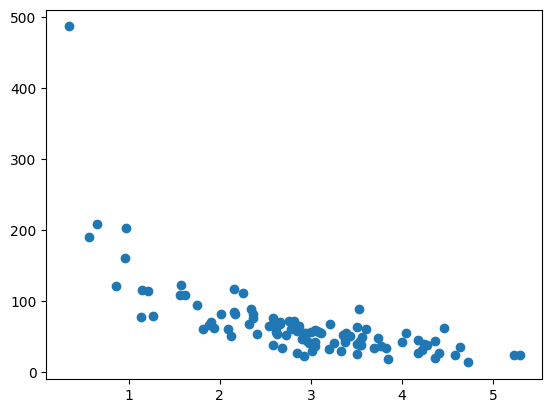

r²： 0.79886455446298


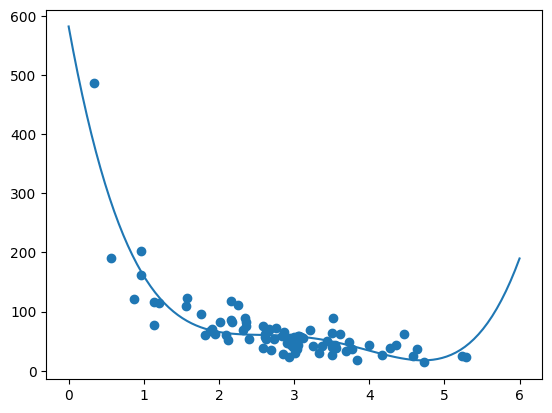

测试集r²： 0.8086921460343566
预测停留5分钟将花费： 22.8796259181172


In [49]:
# 80%的数据用于训练，20%的数据用于测试
# 下面用随机数生成数据集
import numpy
import matplotlib.pyplot as plt

# seed(x)，将输出以x为种子的随机数序列，再次用相同的数做种子，又会从该序列头部开始生成随机数
# 一般情况下不指定seed则默认使用系统时间做seed，则不会有相同的随机数序列
numpy.random.seed(2)

# 峰值在3，平坦，100个随机正态分布数
x = numpy.random.normal(3, 1, 100)

# 峰值150，生成的值将按位除以x
y = numpy.random.normal(150, 40, 100) / x

# 散点图
plt.scatter(x, y)
plt.show()

# 将数据集查分为训练集和测试集
tran_x = x[:80]
tran_y = y[:80]
test_x = x[80:]
test_y = y[80:]

# 使用多项式回归来做
from sklearn.metrics import r2_score

mymodel = np.poly1d(numpy.polyfit(tran_x, tran_y, 4))
print("r²：", r2_score(tran_y, mymodel(tran_x)))
myline = np.linspace(0, 6, 100)
plt.scatter(tran_x, tran_y)
plt.plot(myline, mymodel(myline))
plt.show()

# 使用测试集来检验
# 首先查看r²的值，0.866说明在测试集上表现也不错
print("测试集r²：", r2_score(test_y, mymodel(test_x)))

# 泛化，预测新值，预测停留5分钟花费多少钱
print("预测停留5分钟将花费：", mymodel(5))